In [1]:
#library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score
import pickle

In [2]:
#memanggil dataset
df = pd.read_csv('PAANEN5.csv')
#deskripsi dataset
df.head()

,masa_panen,arus,Salinitas,suhu,total_produksi,modal
0,2011/08/10,NaN,33,30,1950,182520
1,2011/08/11,NaN,33,29,952,89107
2,2011/08/14,NaN,33,30,1557,145735
3,2011/08/14,NaN,33,30,1225,114660
4,2011/08/14,NaN,33,30,978,915408


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   masa_panen      702 non-null    object 
 1   arus            684 non-null    float64
 2   Salinitas       702 non-null    int64  
 3   suhu            702 non-null    int64  
 4   total_produksi  702 non-null    int64  
 5   modal           702 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 33.0+ KB


In [4]:
df['total_produksi'] = df['total_produksi'].astype(float)
df['masa_panen'] = pd.to_datetime(df['masa_panen'], format='%Y/%m/%d', errors='coerce')


<Axes: >

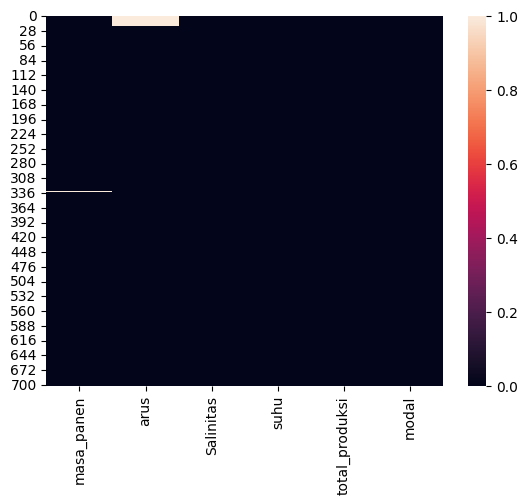

In [5]:
#melihat missing data
sns.heatmap(df.isnull())

In [6]:
#mengisi data yang kosong pada kolom arus
rata_arus = df['arus'].mean()

In [7]:
df['arus'] = df['arus'].fillna(rata_arus)
df['arus'].isna().sum()

0

In [72]:
df

,masa_panen,arus,Salinitas,suhu,total_produksi,modal
0,2011-08-10,0.612199,3.207534,3.107233,12.493330,56.724432
1,2011-08-11,0.612199,3.207534,3.072317,9.837369,44.665336
2,2011-08-14,0.612199,3.207534,3.107233,11.590341,52.624497
3,2011-08-14,0.612199,3.207534,3.107233,10.699875,48.581469
4,2011-08-14,0.612199,3.207534,3.107233,9.926122,97.096796
...,...,...,...,...,...,...
697,2022-08-18,0.760590,3.207534,3.107233,15.149614,99.205098
698,2022-09-18,0.683990,3.207534,3.072317,13.234407,86.567235
699,2022-10-18,0.683990,3.207534,3.072317,13.480997,88.278388
700,2022-11-18,0.887904,3.207534,3.072317,13.480997,88.278388


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   masa_panen      701 non-null    datetime64[ns]
 1   arus            702 non-null    float64       
 2   Salinitas       702 non-null    float64       
 3   suhu            702 non-null    float64       
 4   total_produksi  702 non-null    float64       
 5   modal           702 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 33.0 KB


<Axes: >

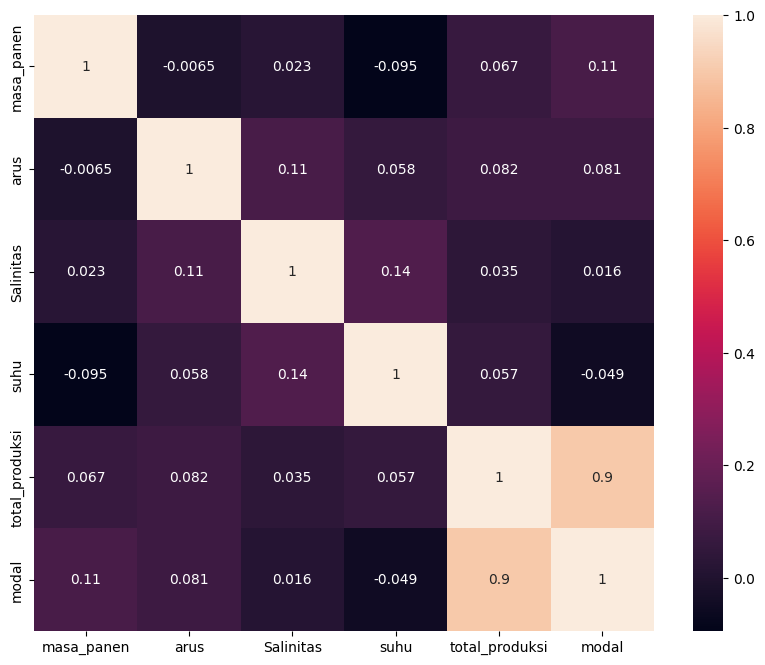

In [74]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

In [75]:
# mencari korelasi 'spearman' untuk tiap pasang variabel
print (df.corr(method='spearman'))

                masa_panen      arus  Salinitas      suhu  total_produksi  \
masa_panen        1.000000  0.068464   0.095568 -0.311268        0.248181   
arus              0.068464  1.000000   0.152959  0.122450        0.131408   
Salinitas         0.095568  0.152959   1.000000  0.143509        0.022924   
suhu             -0.311268  0.122450   0.143509  1.000000        0.061384   
total_produksi    0.248181  0.131408   0.022924  0.061384        1.000000   
modal             0.409692  0.043013  -0.009643 -0.044903        0.910416   

                   modal  
masa_panen      0.409692  
arus            0.043013  
Salinitas      -0.009643  
suhu           -0.044903  
total_produksi  0.910416  
modal           1.000000  


In [76]:
# mencari korelasi 'kendall' untuk tiap pasang variabel
print (df.corr(method='kendall'))

                masa_panen      arus  Salinitas      suhu  total_produksi  \
masa_panen        1.000000  0.039940   0.078242 -0.229351        0.157396   
arus              0.039940  1.000000   0.126944  0.083524        0.087931   
Salinitas         0.078242  0.126944   1.000000  0.128102        0.018756   
suhu             -0.229351  0.083524   0.128102  1.000000        0.044633   
total_produksi    0.157396  0.087931   0.018756  0.044633        1.000000   
modal             0.276711  0.026747  -0.007883 -0.032625        0.766926   

                   modal  
masa_panen      0.276711  
arus            0.026747  
Salinitas      -0.007883  
suhu           -0.032625  
total_produksi  0.766926  
modal           1.000000  


In [77]:
df.describe()

,masa_panen,arus,Salinitas,suhu,total_produksi,modal
count,701,702.000000,702.000000,702.000000,702.000000,702.000000
mean,2015-07-02 01:11:53.837375232,0.571291,3.208859,3.086281,9.196772,47.043281
min,2011-02-21 00:00:00,0.000000,3.207534,2.962496,2.289428,12.486920
25%,2013-12-16 00:00:00,0.506580,3.207534,3.036589,7.047299,33.851778
50%,2014-10-10 00:00:00,0.584804,3.207534,3.107233,8.660169,41.223624
75%,2016-12-20 00:00:00,0.661911,3.207534,3.107233,10.626586,51.289680
max,2022-12-18 00:00:00,0.928318,3.239612,3.207534,38.529970,174.940606
std,NaN,0.163012,0.006388,0.048316,3.350301,21.336033


In [78]:
#melihat kemiringan
print ('Kemiringan Data Arus', df["arus"].skew())
print ('Kemiringan Data Salinitas', df["Salinitas"].skew())
print ('Kemiringan Data Suhu', df["suhu"].skew())
print ('Kemiringan Data Total Produksi', df["total_produksi"].skew())
print ('Kemiringan Data Modal', df["modal"].skew())

Kemiringan Data Arus -0.5766702257271856
Kemiringan Data Salinitas 4.619647746200072
Kemiringan Data Suhu -0.05950364973863728
Kemiringan Data Total Produksi 1.5791425046543548
Kemiringan Data Modal 1.4850504158613862


In [79]:
#melihat kemiringan
print ('Keruncingan Data Arus', df["arus"].kurtosis())
print ('Keruncingan Data Salinitas', df["Salinitas"].kurtosis())
print ('Keruncingan Data Suhu', df["suhu"].kurtosis())
print ('Keruncingan Data Total Produksi', df["total_produksi"].kurtosis())
print ('Keruncingan Data Modal', df["modal"].kurtosis())

Keruncingan Data Arus 0.3636631859628552
Keruncingan Data Salinitas 19.396397787689413
Keruncingan Data Suhu -0.3947162960573509
Keruncingan Data Total Produksi 8.234430300911402
Keruncingan Data Modal 2.4595576553416203


c:\Users\Nabila Tufailah\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


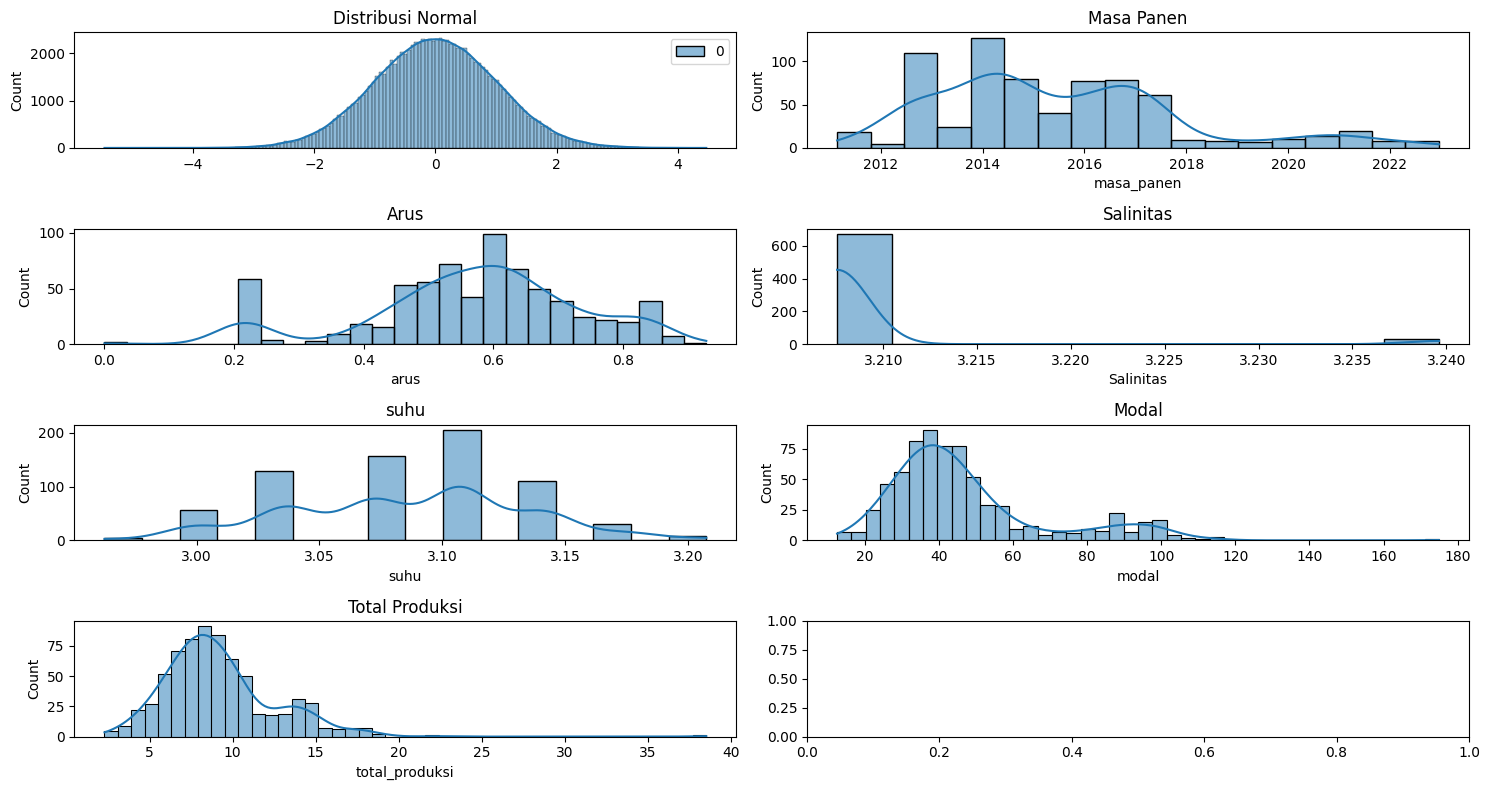

In [80]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 8), gridspec_kw={'width_ratios': [1, 1]})

normal_rets = np.random.normal(0,1,(100000,1))
sns.histplot(normal_rets, ax=axes[0, 0], kde=True)
axes[0, 0].set_title('Distribusi Normal')

sns.histplot(df.masa_panen, ax=axes[0, 1], kde=True)
axes[0, 1].set_title('Masa Panen')

sns.histplot(df.arus, ax=axes[1, 0], kde=True)
axes[1, 0].set_title('Arus')

sns.histplot(df.Salinitas, ax=axes[1, 1], kde=True)
axes[1, 1].set_title('Salinitas')

sns.histplot(df.suhu, ax=axes[2, 0], kde=True)
axes[2, 0].set_title('suhu')

sns.histplot(df.modal, ax=axes[2, 1], kde=True)
axes[2, 1].set_title('Modal')

sns.histplot(df.total_produksi, ax=axes[3, 0], kde=True)
axes[3, 0].set_title('Total Produksi')

plt.tight_layout()
plt.show()

In [81]:
# Mengaplikasikan cuberoot root transformation pada kolom tertentu : indikasi right skeness
columns_to_transform = ['suhu','arus','modal','Salinitas','total_produksi']
df[columns_to_transform]= np.cbrt(df[columns_to_transform])


c:\Users\Nabila Tufailah\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


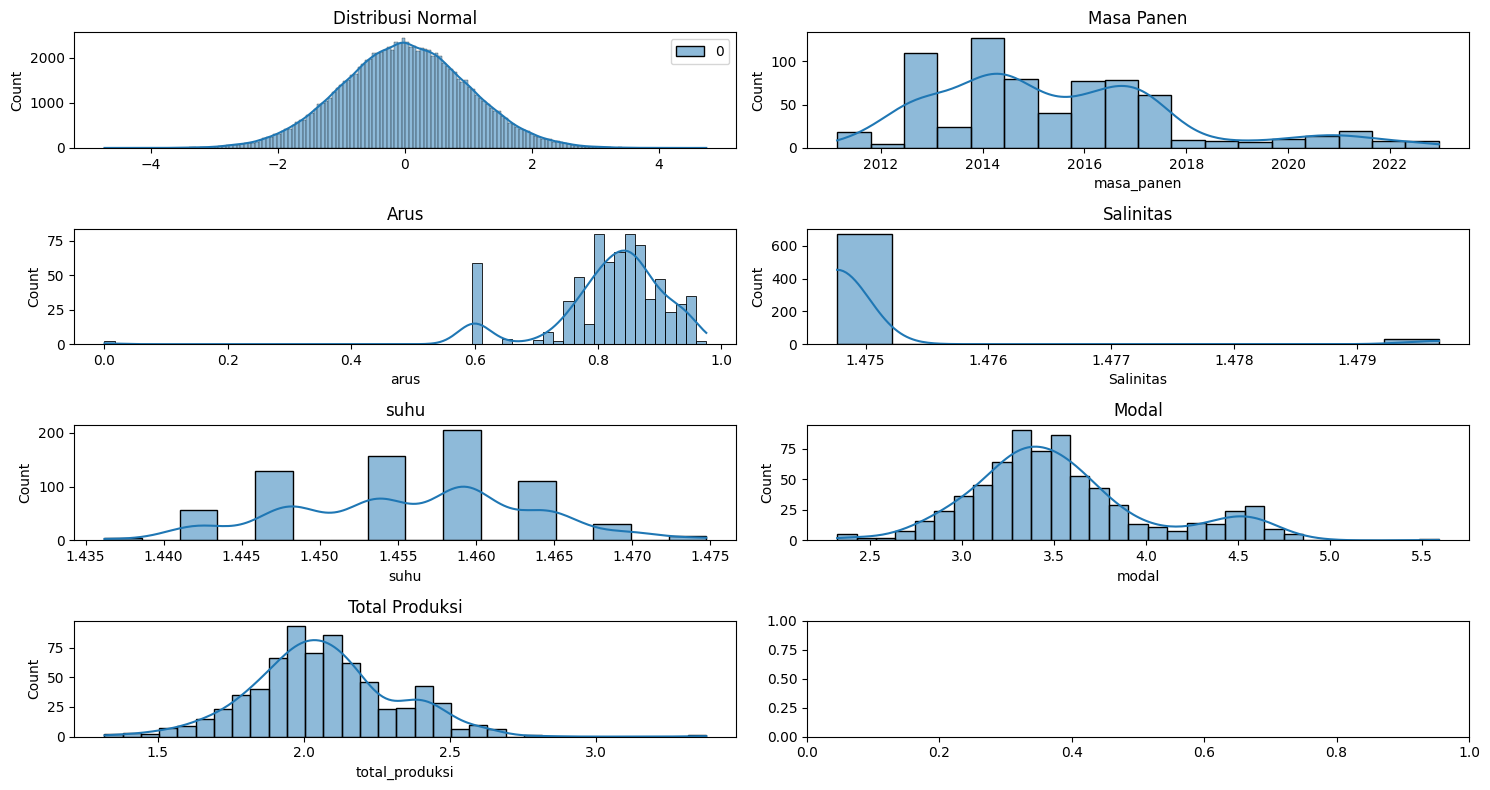

In [82]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 8), gridspec_kw={'width_ratios': [1, 1]})

normal_rets = np.random.normal(0,1,(100000,1))
sns.histplot(normal_rets, ax=axes[0, 0], kde=True)
axes[0, 0].set_title('Distribusi Normal')

sns.histplot(df.masa_panen, ax=axes[0, 1], kde=True)
axes[0, 1].set_title('Masa Panen')

sns.histplot(df.arus, ax=axes[1, 0], kde=True)
axes[1, 0].set_title('Arus')

sns.histplot(df.Salinitas, ax=axes[1, 1], kde=True)
axes[1, 1].set_title('Salinitas')

sns.histplot(df.suhu, ax=axes[2, 0], kde=True)
axes[2, 0].set_title('suhu')

sns.histplot(df.modal, ax=axes[2, 1], kde=True)
axes[2, 1].set_title('Modal')

sns.histplot(df.total_produksi, ax=axes[3, 0], kde=True)
axes[3, 0].set_title('Total Produksi')

plt.tight_layout()
plt.show()

c:\Users\Nabila Tufailah\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\Nabila Tufailah\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\Nabila Tufailah\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\Nabila Tufailah\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and 

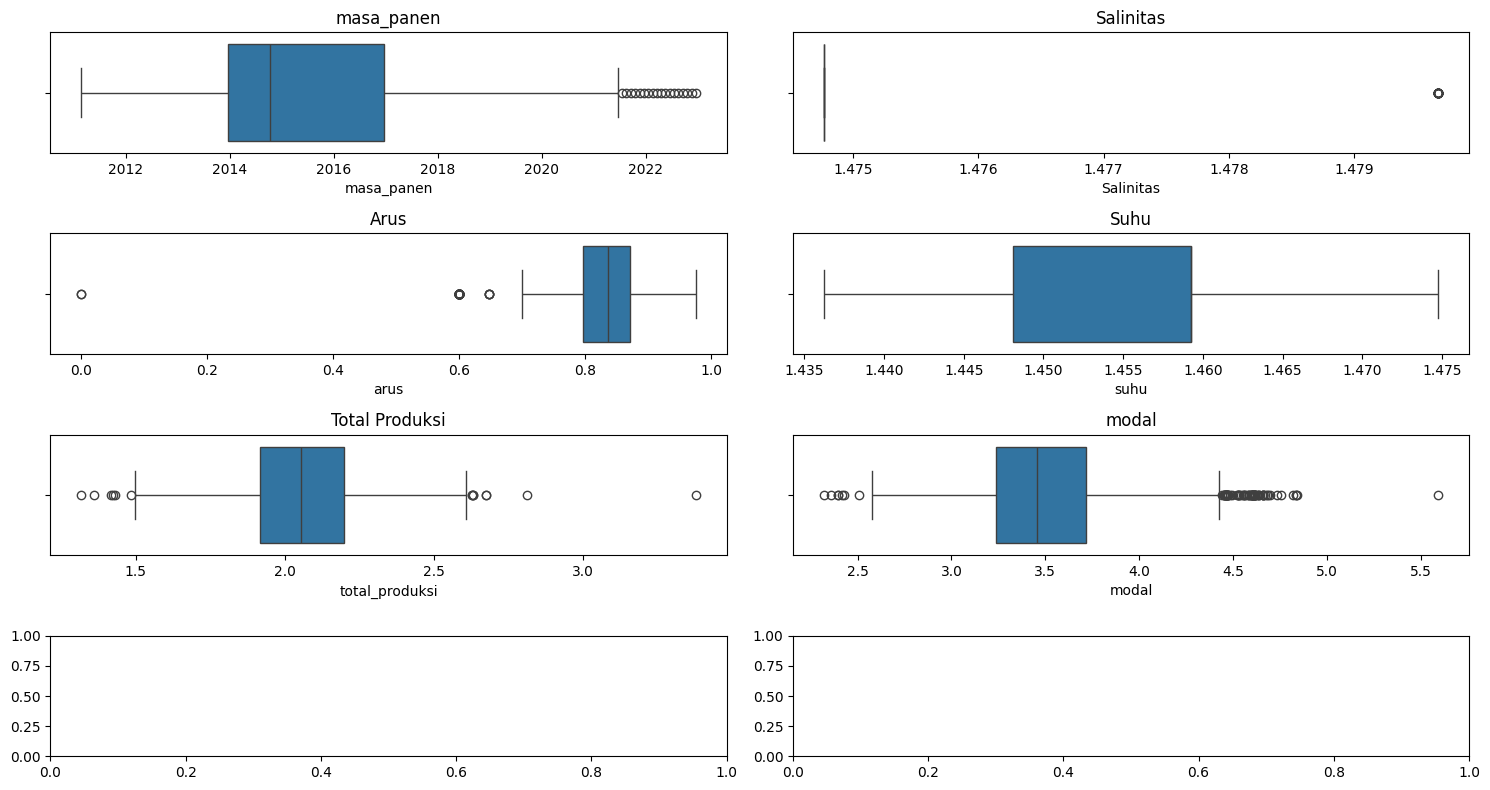

In [83]:
# Membuat plot dengan m baris, n kolom, dan p penempatan kanan (2) dan kiri (1)
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 8), gridspec_kw={'width_ratios': [1, 1]})

sns.boxplot(x=df.masa_panen, ax=axes[0, 0])
axes[0, 0].set_title('masa_panen')

sns.boxplot(x=df.Salinitas, ax=axes[0, 1])
axes[0, 1].set_title('Salinitas')

sns.boxplot(x=df.arus, ax=axes[1, 0])
axes[1, 0].set_title('Arus')

sns.boxplot(x=df.suhu, ax=axes[1, 1])
axes[1, 1].set_title('Suhu')

sns.boxplot(x=df.total_produksi, ax=axes[2, 0])
axes[2, 0].set_title('Total Produksi')

sns.boxplot(x=df.modal, ax=axes[2, 1])
axes[2, 1].set_title('modal')

plt.tight_layout()
plt.show()

In [84]:
def remove_outliers(df, columns):
    df2 = df.copy()
    for column in columns:
        Q1 = df2[column].quantile(0.25)
        Q3 = df2[column].quantile(0.75)
        IQR = Q3 - Q1

        # Filter data tanpa outlier
        df2 = df2[(df2[column] >= Q1 - 1.5 * IQR) & (df2[column] <= Q3 + 1.5 * IQR)]

    return df2

# List kolom yang ingin dihapus outlier-nya
kolom = ['masa_panen', 'Salinitas', 'arus', 'suhu', 'total_produksi', 'modal']

# Hapus outlier dari DataFrame
df2 = remove_outliers(df, kolom)

# Cetak DataFrame tanpa outlier
print(df2)

    masa_panen      arus  Salinitas      suhu  total_produksi     modal
0   2011-08-10  0.849110   1.474768  1.459233        2.320382  3.842289
1   2011-08-11  0.849110   1.474768  1.453746        2.142692  3.548054
2   2011-08-14  0.849110   1.474768  1.459233        2.263074  3.747394
3   2011-08-14  0.849110   1.474768  1.459233        2.203567  3.648857
5   2011-08-17  0.849110   1.474768  1.459233        2.193387  3.632001
..         ...       ...        ...       ...             ...       ...
657 2020-07-16  0.809943   1.474768  1.453746        2.018001  3.775423
658 2020-07-19  0.809943   1.474768  1.459233        2.122975  3.971815
659 2020-07-21  0.809943   1.474768  1.453746        2.226935  4.166311
660 2020-07-24  0.809943   1.474768  1.459233        1.957498  3.631079
666 2020-12-16  0.943060   1.474768  1.453746        2.113099  3.907328

[519 rows x 6 columns]


In [85]:
#melihat data yang kosong akibat penghapusan outlier
df2.isnull().any()

masa_panen        False
arus              False
Salinitas         False
suhu              False
total_produksi    False
modal             False
dtype: bool

c:\Users\Nabila Tufailah\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\Nabila Tufailah\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\Nabila Tufailah\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\Nabila Tufailah\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and 

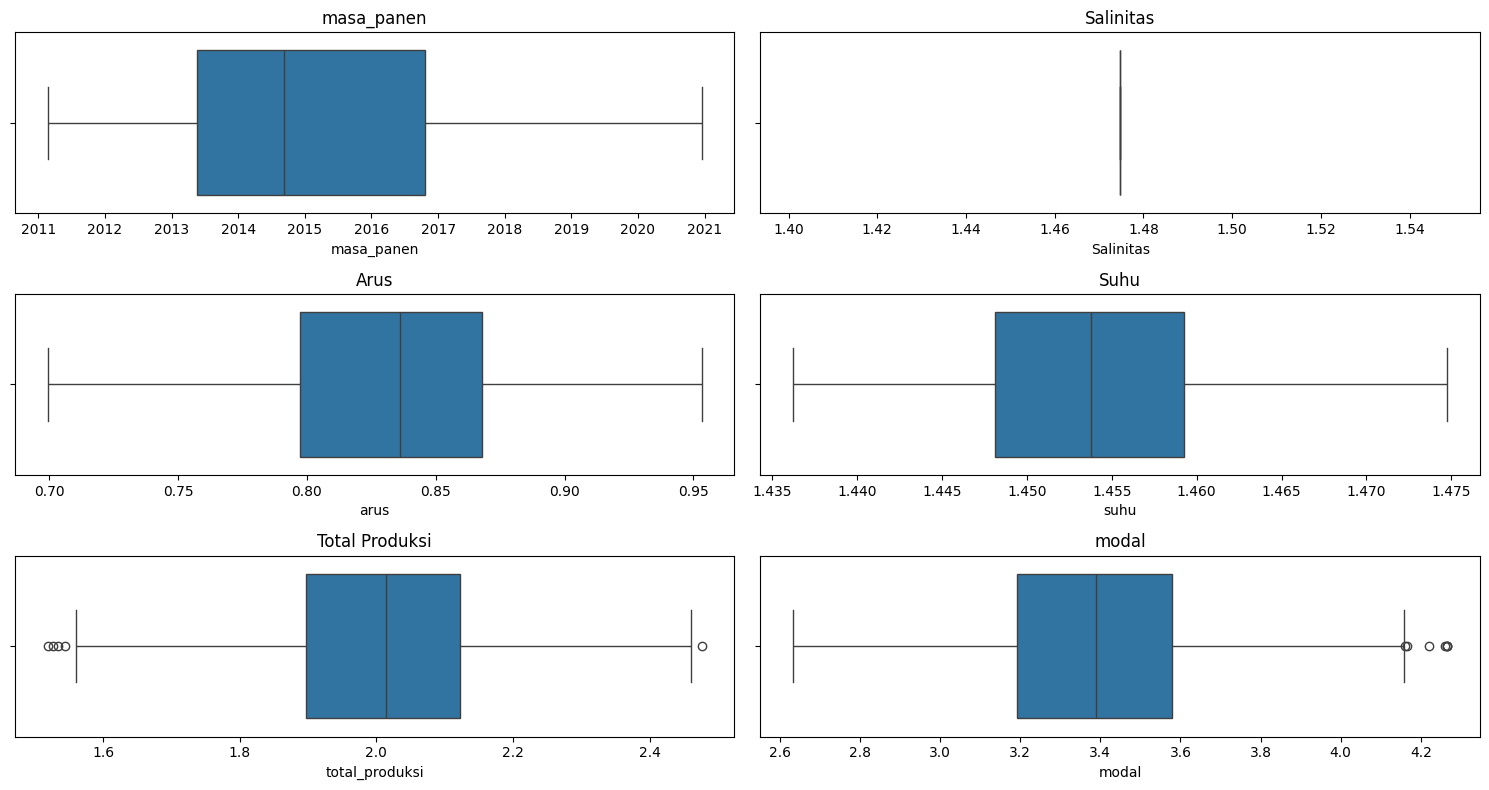

In [86]:
# Membuat plot dengan m baris, n kolom, dan p penempatan kanan (2) dan kiri (1)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 8), gridspec_kw={'width_ratios': [1, 1]})

sns.boxplot(x=df2.masa_panen, ax=axes[0, 0])
axes[0, 0].set_title('masa_panen')

sns.boxplot(x=df2.Salinitas, ax=axes[0, 1])
axes[0, 1].set_title('Salinitas')

sns.boxplot(x=df2.arus, ax=axes[1, 0])
axes[1, 0].set_title('Arus')

sns.boxplot(x=df2.suhu, ax=axes[1, 1])
axes[1, 1].set_title('Suhu')

sns.boxplot(x=df2.total_produksi, ax=axes[2, 0])
axes[2, 0].set_title('Total Produksi')

sns.boxplot(x=df2.modal, ax=axes[2, 1])
axes[2, 1].set_title('modal')

plt.tight_layout()
plt.show()


In [87]:
print ('before removing outliers :', len(df))
print ('after removing outliers :', len(df2))
print ('outliers :',len(df)-len(df2))

before removing outliers : 702
after removing outliers : 519
outliers : 183


<Axes: >

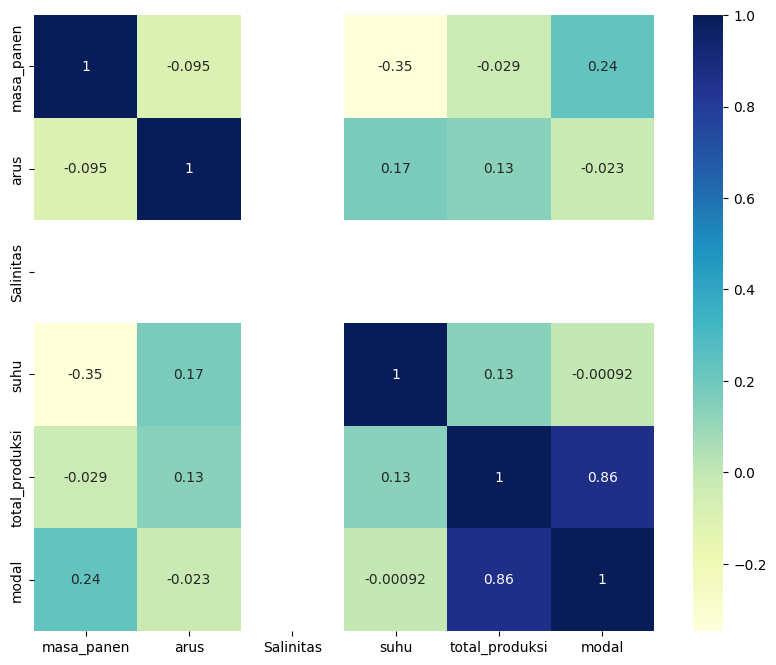

In [88]:
plt.figure(figsize=(10,8))
sns.heatmap(df2.corr(),cmap="YlGnBu", annot=True)

In [89]:
# mencari korelasi 'kendall' untuk tiap pasang variabel
print (df2.corr(method='kendall'))

                masa_panen      arus  Salinitas      suhu  total_produksi  \
masa_panen        1.000000 -0.087100        NaN -0.276004       -0.036916   
arus             -0.087100  1.000000        NaN  0.152167        0.070960   
Salinitas              NaN       NaN        1.0       NaN             NaN   
suhu             -0.276004  0.152167        NaN  1.000000        0.084402   
total_produksi   -0.036916  0.070960        NaN  0.084402        1.000000   
modal             0.132390 -0.019153        NaN -0.019107        0.697276   

                   modal  
masa_panen      0.132390  
arus           -0.019153  
Salinitas            NaN  
suhu           -0.019107  
total_produksi  0.697276  
modal           1.000000  


In [90]:
# mencari korelasi 'spearman' untuk tiap pasang variabel
print (df2.corr(method='spearman'))

                masa_panen      arus  Salinitas      suhu  total_produksi  \
masa_panen        1.000000 -0.132221        NaN -0.380294       -0.054564   
arus             -0.132221  1.000000        NaN  0.214266        0.104818   
Salinitas              NaN       NaN        NaN       NaN             NaN   
suhu             -0.380294  0.214266        NaN  1.000000        0.115556   
total_produksi   -0.054564  0.104818        NaN  0.115556        1.000000   
modal             0.205041 -0.030590        NaN -0.026395        0.861245   

                   modal  
masa_panen      0.205041  
arus           -0.030590  
Salinitas            NaN  
suhu           -0.026395  
total_produksi  0.861245  
modal           1.000000  


In [91]:
df2.shape

(519, 6)

In [92]:
# Convert 'masa_panen' to period (day)
df2['masa_panen'] = df2['masa_panen'].dt.to_period("D")

# Group by 'masa_panen' and sum the number of items
tanggal_masapanen = df2.groupby('masa_panen').sum().reset_index()

tanggal_masapanen['masa_panen'] = tanggal_masapanen['masa_panen'].dt.to_timestamp()

In [93]:
tanggal_masapanen.head(10)

,masa_panen,arus,Salinitas,suhu,total_produksi,modal
0,2011-02-21,1.698221,2.949536,2.929118,4.233191,6.838026
1,2011-08-10,0.849110,1.474768,1.459233,2.320382,3.842289
2,2011-08-11,0.849110,1.474768,1.453746,2.142692,3.548054
3,2011-08-14,1.698221,2.949536,2.918466,4.466641,7.396251
4,2011-08-17,3.396442,5.899073,5.836931,8.387387,13.888561
5,2011-08-18,0.849110,1.474768,1.453746,2.143939,3.550120
6,2011-10-04,0.849110,1.474768,1.464559,2.223794,3.592173
7,2011-10-08,1.698221,2.949536,2.896179,3.912828,6.320535
8,2011-10-09,0.849110,1.474768,1.459233,2.143939,3.463181
9,2011-10-10,0.849110,1.474768,1.459233,2.090341,3.376607


In [94]:
tanggal_masapanen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   masa_panen      260 non-null    datetime64[ns]
 1   arus            260 non-null    float64       
 2   Salinitas       260 non-null    float64       
 3   suhu            260 non-null    float64       
 4   total_produksi  260 non-null    float64       
 5   modal           260 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 12.3 KB


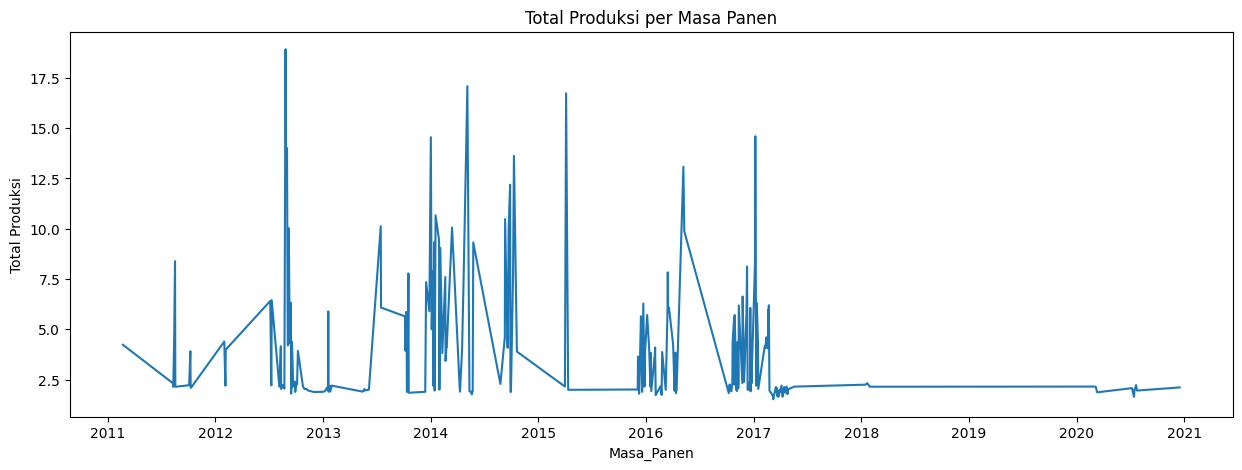

In [95]:
#visualization
plt.figure(figsize=(15,5))
plt.plot(tanggal_masapanen['masa_panen'], tanggal_masapanen['total_produksi'])
plt.xlabel("Masa_Panen")
plt.ylabel("Total Produksi")
plt.title("Total Produksi per Masa Panen")
plt.show()

In [96]:
tanggal_masapanen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   masa_panen      260 non-null    datetime64[ns]
 1   arus            260 non-null    float64       
 2   Salinitas       260 non-null    float64       
 3   suhu            260 non-null    float64       
 4   total_produksi  260 non-null    float64       
 5   modal           260 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 12.3 KB


In [97]:
tanggal_masapanen['masa_panen'] = tanggal_masapanen['masa_panen'].astype('int64')

In [98]:
#pembagian data
X = tanggal_masapanen.iloc[:,[0,1,2,3,5]].values
y = tanggal_masapanen.iloc[:,4].values

In [99]:
X_train, X_test, y_train, y_test = train_test_split (X,y,test_size=0.25, random_state=100)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1,1)
print ("Train Data Shape: ", X_train.shape, y_train.shape)
print ("Test Data Shape: ", X_test.shape, y_test.shape)

Train Data Shape:  (195, 5) (195, 1)
Test Data Shape:  (65, 5) (65, 1)


In [100]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) 

In [101]:
#from sklearn.decomposition import PCA
#pca = PCA(5)
#pca.fit(X_train_scaled)

In [102]:
#explained_variance_ratio = pca.explained_variance_ratio_
#print("Explained Variance Ratio for each Principal Component:")
#for i, ratio in enumerate(explained_variance_ratio):
#    print(f"  Principal Component {i+1}: {ratio}")

In [103]:
#X_train_scaled = pca.transform(X_train_scaled)
#X_test_scaled = pca.transform(X_test_scaled)

In [104]:
#GridsearchCV
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
models = {}

for kernel in kernels:
    svr_model = SVR(kernel=kernel)

    param_grid = {}
    if kernel == 'linear':
        param_grid = {"C": [0.1, 1, 10, 100]}
    elif kernel == 'poly':
        param_grid = {"C": [0.1, 1, 10, 100], "degree": [2, 3, 4], "coef0": [0.0, 0.1, 0.5], "gamma": [0.01, 0.1, 1]}
    elif kernel == 'rbf':
        param_grid = {"C": [0.1, 1, 10, 100], "gamma": [0.01, 0.1], "epsilon": [1, 0.1, 0.01]}
    elif kernel == 'sigmoid':
        param_grid = {"C": [0.1, 1, 10, 100], "coef0": [0.0, 0.1, 0.5], "gamma": [0.01, 0.1, 1]}

    grid_search = GridSearchCV(svr_model, param_grid, cv=5, n_jobs=-1, verbose=1, scoring='neg_mean_squared_error')
    grid_search.fit(X_train_scaled, y_train.ravel())

    best_model = grid_search.best_estimator_

    y_pred = best_model.predict(X_test_scaled)

    mse = mean_squared_error(y_test.ravel(), y_pred.ravel())
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_test.ravel() - y_pred) / y_test.ravel())) * 100
    r2 = r2_score(y_test.ravel(), y_pred.ravel())
    models[kernel] = best_model

    print(f"Kernel: {kernel}")
    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"RMSE: {rmse}")
    print(f'MAPE: {mape:.2f}%')
    print(f"R2 Score: {r2}")
    print("-------------")


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Kernel: linear
Best Parameters: {'C': 100}
RMSE: 0.21338533015260341
MAPE: 3.20%
R2 Score: 0.9957660546125885
-------------
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Kernel: poly
Best Parameters: {'C': 100, 'coef0': 0.5, 'degree': 3, 'gamma': 0.1}
RMSE: 0.19447265783572962
MAPE: 3.23%
R2 Score: 0.9964833169117493
-------------
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Kernel: rbf
Best Parameters: {'C': 100, 'epsilon': 0.01, 'gamma': 0.01}
RMSE: 0.24000545723279113
MAPE: 3.18%
R2 Score: 0.9946437804896298
-------------
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Kernel: sigmoid
Best Parameters: {'C': 1, 'coef0': 0.0, 'gamma': 0.01}
RMSE: 0.2948700831085836
MAPE: 7.01%
R2 Score: 0.9919150459141386
-------------


In [114]:
# Memilih kernel terbaik
selected_kernel = 'rbf'
best_model_file = f"kernel_mantap4_{selected_kernel}.pkl"

In [115]:
# Membuka model terbaik dari file menggunakan pickle
with open(best_model_file, 'wb') as f:
    pickle.dump(models[selected_kernel], f)

In [116]:
# Membuka kembali model terbaik dari file pickle
with open(best_model_file, 'rb') as f:
    loaded_model = pickle.load(f)

In [117]:
# Cek apakah model telah dimuat dengan benar
print("Model yang dimuat:", loaded_model)

Model yang dimuat: SVR(C=100, epsilon=0.01, gamma=0.01)


In [118]:
# Melakukan prediksi dengan data uji menggunakan model dari pickle
y_pred_test_pickle = loaded_model.predict(X_test_scaled)

In [125]:
import datetime

tanggal = 18
bulan = 12
tahun = 2022

tanggal_input = datetime.date(tahun, bulan, tanggal)
tanggal_numerik = tanggal_input.toordinal()

nilai_input = [tanggal_numerik, 0.8, 33, 30, 786240]

# Melakukan prediksi baru menggunakan model dari pickle
prediksi = loaded_model.predict([nilai_input])

# Memformat hasil prediksi menjadi string dengan 3 angka desimal
prediksi_formatted = '{:.3f}'.format(prediksi[0])

print("Prediksi Baru:", prediksi_formatted)



Prediksi Baru: 8.437


In [124]:
# Melakukan prediksi baru menggunakan model dari pickle
prediksi = loaded_model.predict([[18122022, 0.8, 33, 30, 786240]])
print("Prediksi Baru:", prediksi)

Prediksi Baru: [8.43669626]


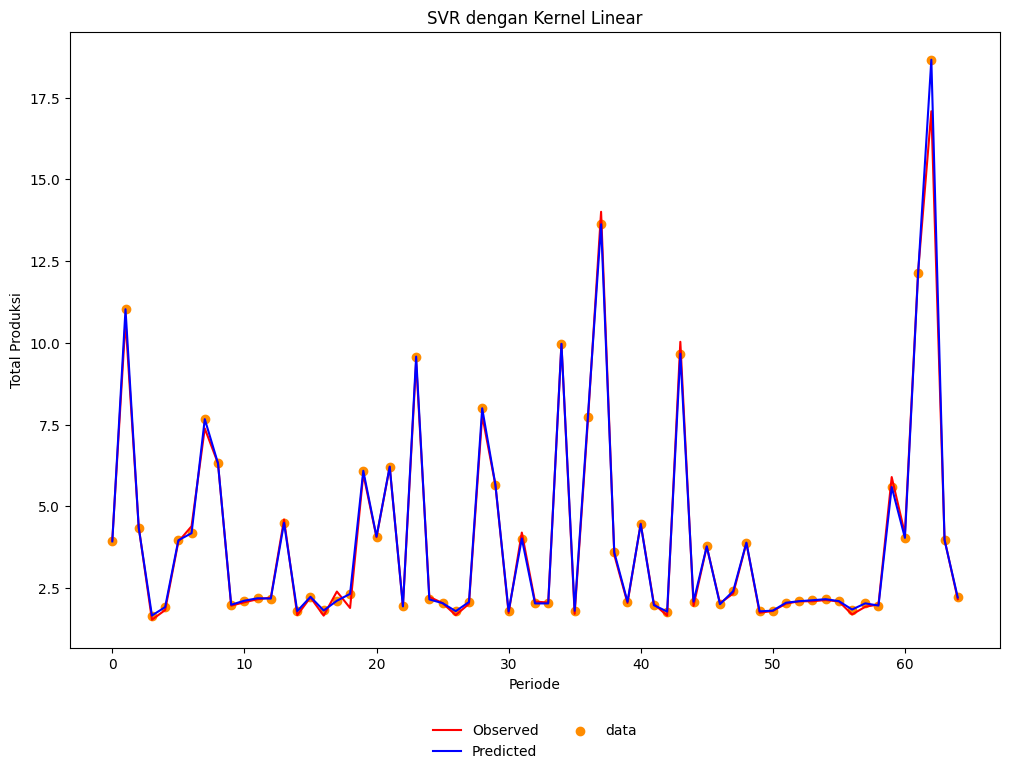

In [121]:
plt.rcParams['figure.figsize'] = (12,8)
x_ax = range(len(X_test_scaled))
plt.plot(x_ax, y_test, label = 'Observed', color = 'r', linestyle = '-')
plt.plot(x_ax, y_pred_test_pickle, label = 'Predicted', color = 'b', linestyle = '-')
plt.scatter(x_ax, y_pred_test_pickle, color='darkorange', label='data')
plt.ylabel('Total Produksi')
plt.xlabel('Periode')
plt.title('SVR dengan Kernel Linear')
plt.legend(bbox_to_anchor = (0.5, -0.2), loc = 'lower center', ncol = 2, frameon = False)
plt.show()

In [122]:
print(f'pandas version: {pd.__version__}')
print(f'numpy version: {np.__version__}')
print(f'matplotlib version: {plt.matplotlib.__version__}')
print(f'seaborn version: {sns.__version__}')
print(f'Scikit-learn version: {sklearn.__version__}')

pandas version: 2.2.1
numpy version: 1.26.1
matplotlib version: 3.8.0
seaborn version: 0.13.0
Scikit-learn version: 1.3.2
